# Image Tampering Detection.

## 1) Authetication Scheme

In [21]:
# Numpy, Pillow, Imageio libraries were used to do the following program. 
import numpy as np
import cv2
from PIL import Image
import imageio as mp
import matplotlib.pyplot as plt

In [22]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [23]:
#Lena Image was opened using pillow library
Lena_Image=cv2.imread('IIT_logo.png')

In [24]:
Lena_Image = cv2.resize(Lena_Image, (256, 256),interpolation = cv2.INTER_NEAREST)

In [25]:
Lena_Matrix=rgb2gray(Lena_Image)

In [26]:
#Dimension of the original image of lena
Lena_Matrix.astype(int)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

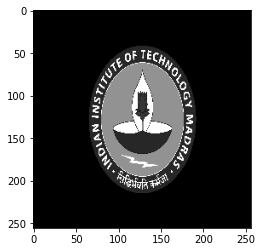

In [27]:
plt.imshow(Lena_Matrix,cmap='gray')

In [28]:
#M,N siginifies rows and columns of the Source_Matrix using shape function
M,N=Lena_Matrix.shape

In [29]:
MSB_lena_matrix=np.zeros((M,N))
LSB_lena_matrix=np.zeros((M,N))

In [30]:
for i in range(M):
    for j in range(N):
        tmp=np.binary_repr(int(Lena_Matrix[i,j]), width=8)
        MSB_lena_matrix[i,j]=tmp[0]
        LSB_lena_matrix[i,j]=tmp[7]

In [31]:
MSB_lena_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
LSB_lena_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
no_of_block=8
block_index=np.arange(0,256+no_of_block,no_of_block)

In [34]:
Svd_single_value=[]
for i in range(len(block_index)-1):
    for j in range(len(block_index)-1):
        a=LSB_lena_matrix[block_index[i]:block_index[i+1],block_index[j]:block_index[j+1]]
        u, s, vh = np.linalg.svd(a)
        Svd_single_value.append(s[0])
Svd_single_value=np.array(Svd_single_value).reshape(32,32)  

In [35]:
np.round(np.sum(Svd_single_value),2)

1890.39

In [36]:
#Lena Image was opened using pillow library
QR_Image=mp.imread('QR.jpeg')[:,:,0]

In [37]:
QR_Image=cv2.resize(QR_Image, (256,256), interpolation = cv2.INTER_AREA)

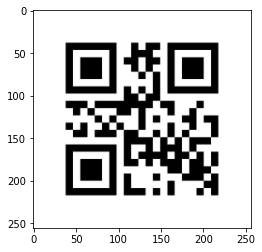

In [38]:
plt.imshow(QR_Image,cmap='gray')

In [39]:
Authetication_image=np.zeros((256,256))
for i in range(256):
  for j in range(256):
    string=np.binary_repr(int(Lena_Matrix[i,j]), width=8)
    string_list=[i for i in string]
    if QR_Image[i,j]==255:
      string_list[0]='1'
    else:
      string_list[0]='0'
    Authetication_image[i,j]=np.int(''.join(string_list),2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


(-0.5, 255.5, 255.5, -0.5)

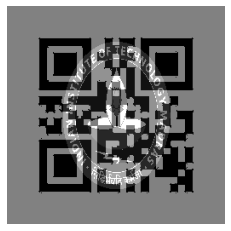

In [40]:
#plt.figure(figsize=(6,6)) 
plt.imshow(Authetication_image,cmap='gray')
plt.axis('off')

#image blurring

(-0.5, 255.5, 255.5, -0.5)

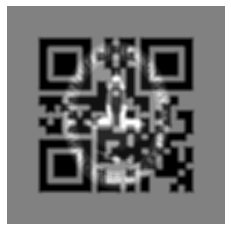

In [ ]:
ksize = (5, 5)
Authetication_image = cv2.blur(Authetication_image, ksize) 
#plt.figure(figsize=(6,6)) 
plt.imshow(Authetication_image,cmap='gray')
plt.axis('off')

## 2) Tampering scene

In [41]:
MSB_lena_matrix2=np.zeros((M,N))
LSB_lena_matrix2=np.zeros((M,N))

In [42]:
for i in range(M):
    for j in range(N):
        tmp=np.binary_repr(int(Authetication_image[i,j]), width=8)
        MSB_lena_matrix2[i,j]=tmp[0]
        LSB_lena_matrix2[i,j]=tmp[7]

(-0.5, 255.5, 255.5, -0.5)

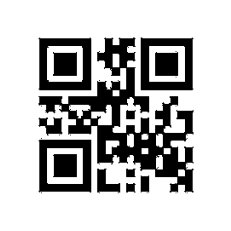

In [43]:
plt.imshow(MSB_lena_matrix2,cmap='gray')
plt.axis('off')

In [ ]:
no_of_block2=8
block_index2=np.arange(0,256+no_of_block2,no_of_block2)

In [ ]:
Svd_single_value2=[]
for i in range(len(block_index2)-1):
    for j in range(len(block_index2)-1):
        a2=LSB_lena_matrix2[block_index2[i]:block_index2[i+1],block_index2[j]:block_index2[j+1]]
        u2, s2, vh2 = np.linalg.svd(a2)
        Svd_single_value2.append(s2[0])
Svd_single_value2=np.array(Svd_single_value2)

In [ ]:
np.round(np.sum(Svd_single_value2))

2380.0

#SVD image reconstruction using first few singular vlaues.

In [ ]:
u, s, vh = np.linalg.svd(Lena_Matrix, full_matrices=True)

(-0.5, 255.5, 255.5, -0.5)

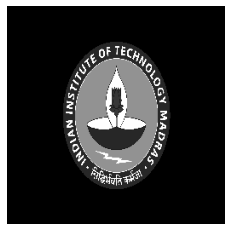

In [ ]:
plt.imshow(Lena_Matrix,cmap='gray')
plt.axis('off')

102600
131328
78.125


(-0.5, 255.5, 255.5, -0.5)

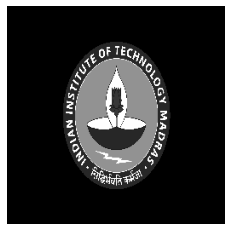

In [ ]:
k=200
si=np.eye(k)
for i in range(k):
  si[i,i]=s[i]
image1 = np.matmul(si, vh[0:k,:])
fin_image = np.matmul(u[:,0:k],image1)
plt.imshow(fin_image,cmap='gray')
print(256*k*2+k)
print(256*256*2+256)
print((256*k*2+k)*100/(256*256*2+256))
plt.axis('off')